<a href="https://colab.research.google.com/github/nkhenissi/pyhton-for-the-data-scientist/blob/main/prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np 

In [48]:
pd.set_option('max_columns', 43)

In [87]:
df=pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/817204ac-2202-4b4a-98e7-4184d154d98c", sep="|", dtype={'Code postal':str})
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,23,24,26,28,30,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,"185000,00",5080.0,NaN,CHE,0471,DE VOGELAS,1370,VAL-REVERMONT,1,426,312.0,ZC,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,97.0,5.0,S,NaN,2410.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,"185000,00",5080.0,NaN,CHE,0471,DE VOGELAS,1370,VAL-REVERMONT,1,426,312.0,ZC,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,2410.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,"10,00",NaN,NaN,NaN,B043,ROUGEMONT,1290,BEY,1,42,NaN,A,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,530.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2021,Vente,"204332,00",7.0,NaN,ALL,0276,DES ECUREUILS,1310,BUELLAS,1,65,NaN,B,1325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,88.0,4.0,S,NaN,866.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,"320000,00",87.0,NaN,RTE,0140,DE CERTINES,1250,MONTAGNAT,1,254,NaN,AZ,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,1426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/03/2021,Vente,"383000,00",8.0,NaN,RUE,9382,DES TOURNELLES,75004,PARIS 04,75,104,NaN,AO,117,NaN,14.0,"28,86",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,30.0,2.0,NaN,NaN,NaN
4375219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17/03/2021,Vente,"260000,00",8.0,NaN,RUE,8561,SAINTE FOY,75002,PARIS 02,75,102,NaN,AP,128,NaN,304.0,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,37.0,2.0,NaN,NaN,NaN
4375220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/03/2021,Vente,"38000,00",6.0,NaN,RUE,4398,DES GUILLEMITES,75004,PARIS 04,75,104,NaN,AH,68,NaN,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4375221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/03/2021,Vente,"38000,00",30.0,NaN,RUE,7338,DU PETIT MUSC,75004,PARIS 04,75,104,NaN,AP,5,NaN,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN


In [ ]:
stat=df.describe(include='all')
print(stat)

In [ ]:
def calculate_percentage(column):
  # Count the missing values in the column
  missing_values = column.isnull().sum()

  # Calculate the total number of values in the column
  total_values = column.count() + missing_values

  # Calculate the percentage of missing values
  percentage = (missing_values / total_values) * 100

  # Return the result
  return percentage

# Calculate the percentage of missing values per column
percentages = df.apply(calculate_percentage)

# Print the results
print(percentages)

Code service sages            100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.915336
No voie                        35.686981
B/T/Q                          95.316833
Type de voie                   38.409037
Code voie                       0.767595
Voie                            0.772418
Code postal                     0.770589
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.549758
Section                         0.004091
No plan                         0.000000
No Volume                      99.783828
1er lot         

In [96]:
df2=df[['Nature mutation','Valeur fonciere', 'Code voie','Voie','Code postal','Commune','Code commune','Code departement','No plan','Section','Code type local','Surface reelle bati','Surface terrain']]
df2

,Nature mutation,Valeur fonciere,Code voie,Voie,Code postal,Commune,Code commune,Code departement,No plan,Section,Code type local,Surface reelle bati,Surface terrain
0,Vente,"185000,00",0471,DE VOGELAS,1370,VAL-REVERMONT,426,1,122,ZC,1.0,97.0,2410.0
1,Vente,"185000,00",0471,DE VOGELAS,1370,VAL-REVERMONT,426,1,122,ZC,3.0,0.0,2410.0
2,Vente,"10,00",B043,ROUGEMONT,1290,BEY,42,1,204,A,NaN,NaN,530.0
3,Vente,"204332,00",0276,DES ECUREUILS,1310,BUELLAS,65,1,1325,B,1.0,88.0,866.0
4,Vente,"320000,00",0140,DE CERTINES,1250,MONTAGNAT,254,1,11,AZ,3.0,0.0,1426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375218,Vente,"383000,00",9382,DES TOURNELLES,75004,PARIS 04,104,75,117,AO,2.0,30.0,NaN
4375219,Vente,"260000,00",8561,SAINTE FOY,75002,PARIS 02,102,75,128,AP,2.0,37.0,NaN
4375220,Vente,"38000,00",4398,DES GUILLEMITES,75004,PARIS 04,104,75,68,AH,3.0,0.0,NaN
4375221,Vente,"38000,00",7338,DU PETIT MUSC,75004,PARIS 04,104,75,5,AP,3.0,0.0,NaN


In [101]:
#On garde uniquement les colonnes concernant les données qui nous intéressent
df2=df[['Nature mutation','Valeur fonciere','Code voie','Code postal','Commune','Code commune','Code departement','Code type local','Surface reelle bati','Surface terrain']]
df2

,Nature mutation,Valeur fonciere,Code voie,Code postal,Commune,Code commune,Code departement,Code type local,Surface reelle bati,Surface terrain
0,Vente,"185000,00",0471,1370,VAL-REVERMONT,426,1,1.0,97.0,2410.0
1,Vente,"185000,00",0471,1370,VAL-REVERMONT,426,1,3.0,0.0,2410.0
2,Vente,"10,00",B043,1290,BEY,42,1,NaN,NaN,530.0
3,Vente,"204332,00",0276,1310,BUELLAS,65,1,1.0,88.0,866.0
4,Vente,"320000,00",0140,1250,MONTAGNAT,254,1,3.0,0.0,1426.0
...,...,...,...,...,...,...,...,...,...,...
4375218,Vente,"383000,00",9382,75004,PARIS 04,104,75,2.0,30.0,NaN
4375219,Vente,"260000,00",8561,75002,PARIS 02,102,75,2.0,37.0,NaN
4375220,Vente,"38000,00",4398,75004,PARIS 04,104,75,3.0,0.0,NaN
4375221,Vente,"38000,00",7338,75004,PARIS 04,104,75,3.0,0.0,NaN


In [98]:
# Créer une fonction pour tester si une valeur est une lettre
def is_letter(val):
    if isinstance(val, str):
        return any(c.isalpha() for c in val)
    return False

# Appliquer la fonction à chaque valeur du DataFrame et compter le nombre de True
letter_counts = df2.applymap(is_letter).sum()

# Calculer le pourcentage de True par colonne
letter_percentages = letter_counts / df2.shape[0]

# Afficher les pourcentages
print(letter_percentages)


Nature mutation        1.000000
Valeur fonciere        0.000000
Code voie              0.387254
Code postal            0.000000
Commune                1.000000
Code commune           0.000000
Code departement       0.004482
Code type local        0.000000
Surface reelle bati    0.000000
Surface terrain        0.000000
dtype: float64


In [102]:
df2 = df2.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
df2

,Nature mutation,Valeur fonciere,Code voie,Code postal,Commune,Code commune,Code departement,Code type local,Surface reelle bati,Surface terrain
0,Vente,185000.00,0471,1370,VAL-REVERMONT,426,1,1.0,97.0,2410.0
1,Vente,185000.00,0471,1370,VAL-REVERMONT,426,1,3.0,0.0,2410.0
2,Vente,10.00,B043,1290,BEY,42,1,NaN,NaN,530.0
3,Vente,204332.00,0276,1310,BUELLAS,65,1,1.0,88.0,866.0
4,Vente,320000.00,0140,1250,MONTAGNAT,254,1,3.0,0.0,1426.0
...,...,...,...,...,...,...,...,...,...,...
4375218,Vente,383000.00,9382,75004,PARIS 04,104,75,2.0,30.0,NaN
4375219,Vente,260000.00,8561,75002,PARIS 02,102,75,2.0,37.0,NaN
4375220,Vente,38000.00,4398,75004,PARIS 04,104,75,3.0,0.0,NaN
4375221,Vente,38000.00,7338,75004,PARIS 04,104,75,3.0,0.0,NaN


In [103]:
#On drop les données manquantes, et on convertit les données. On convertit d'abord le Code postal et le Code type local en int pour enlever la partie décimale
df2=df2.dropna().astype({"Code type local":int, 'Nature mutation':str, 'Commune':str, 'Surface reelle bati':float, 'Surface terrain':float, 'Code postal':int, 'Valeur fonciere':float})
#On convertit le Code postal et le Code type local en str
df2=df2.astype({"Code type local":str, "Code postal":str})
df2

,Nature mutation,Valeur fonciere,Code voie,Code postal,Commune,Code commune,Code departement,Code type local,Surface reelle bati,Surface terrain
0,Vente,185000.0,0471,1370,VAL-REVERMONT,426,1,1,97.0,2410.0
1,Vente,185000.0,0471,1370,VAL-REVERMONT,426,1,3,0.0,2410.0
3,Vente,204332.0,0276,1310,BUELLAS,65,1,1,88.0,866.0
4,Vente,320000.0,0140,1250,MONTAGNAT,254,1,3,0.0,1426.0
5,Vente,320000.0,0140,1250,MONTAGNAT,254,1,1,168.0,1426.0
...,...,...,...,...,...,...,...,...,...,...
4375192,Vente,2000000.0,7590,75002,PARIS 02,102,75,2,39.0,77.0
4375193,Vente,2000000.0,7590,75002,PARIS 02,102,75,2,39.0,77.0
4375194,Vente,2000000.0,7590,75002,PARIS 02,102,75,2,39.0,77.0
4375195,Vente,2000000.0,7590,75002,PARIS 02,102,75,2,12.0,77.0


In [121]:
#On garde uniquement les données concernant Marseille et ses arrondissements
df3=df2[df2["Code postal"].isin(['13000','13001','13002','13003','13004','13005','13006','13007','13008','13009','13010','13011','13012','13013','13014','13015','13016'])]
df3 

,Nature mutation,Valeur fonciere,Code voie,Code postal,Commune,Code commune,Code departement,Code type local,Surface reelle bati,Surface terrain
400763,Vente,230000.0,6930,13015,MARSEILLE 15EME,215,13,4,270.0,151.0
400768,Vente,610000.0,4083,13016,MARSEILLE 16EME,216,13,1,118.0,605.0
400820,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,3,0.0,278.0
400821,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,45.0,278.0
400822,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,52.0,278.0
...,...,...,...,...,...,...,...,...,...,...
441152,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,45.0,828.0
441153,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,37.0,828.0
441154,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,100.0,828.0
441155,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,80.0,828.0


In [122]:
#On garde uniquement les données concernant les ventes
df4=df3[df3["Nature mutation"]=="Vente"]

#On garde uniquement les données concernant des viens de valeur inférieure ou égale à 2 000 000€
df4=df4[df4["Valeur fonciere"]<=2000000]

#On garde uniquement les données concernant les maisons (1) et les appartements (2)
df4=df4[df4["Code type local"].isin(["1","2"])]

#On garde uniquement les ventes concernant des biens construits, pas des terrains
df4=df4[df4["Surface reelle bati"]!=0]
df4

,Nature mutation,Valeur fonciere,Code voie,Code postal,Commune,Code commune,Code departement,Code type local,Surface reelle bati,Surface terrain
400768,Vente,610000.0,4083,13016,MARSEILLE 16EME,216,13,1,118.0,605.0
400821,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,45.0,278.0
400822,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,52.0,278.0
400823,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,15.0,278.0
400824,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,60.0,278.0
...,...,...,...,...,...,...,...,...,...,...
441152,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,45.0,828.0
441153,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,37.0,828.0
441154,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,100.0,828.0
441155,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,80.0,828.0


In [123]:
#Dans le cas des appartements, la surface du terrain désigne la surface cadastrale du terrain, qui n'est pas vendue
#lors de la transaction. On la remplace donc par 0.
for i in range(df4.shape[0]):
    if df4.iloc[i,4]=='2':
        df4.iloc[i,6]=0

In [115]:
df4

,Nature mutation,Valeur fonciere,Code voie,Code postal,Commune,Code commune,Code departement,Code type local,Surface reelle bati,Surface terrain
400768,Vente,610000.0,4083,13016,MARSEILLE 16EME,216,13,1,118.0,605.0
400821,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,45.0,278.0
400822,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,52.0,278.0
400823,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,15.0,278.0
400824,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,60.0,278.0
...,...,...,...,...,...,...,...,...,...,...
441152,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,45.0,828.0
441153,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,37.0,828.0
441154,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,100.0,828.0
441155,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,80.0,828.0


In [124]:
df4=df4.drop(columns=['Commune','Nature mutation','Surface terrain'])


In [125]:
df4

,Valeur fonciere,Code voie,Code postal,Code commune,Code departement,Code type local,Surface reelle bati
400768,610000.0,4083,13016,216,13,1,118.0
400821,260000.0,4755,13016,216,13,2,45.0
400822,260000.0,4755,13016,216,13,2,52.0
400823,260000.0,4755,13016,216,13,2,15.0
400824,260000.0,4755,13016,216,13,2,60.0
...,...,...,...,...,...,...,...
441152,520000.0,2856,13011,211,13,2,45.0
441153,520000.0,2856,13011,211,13,2,37.0
441154,520000.0,2856,13011,211,13,2,100.0
441155,520000.0,2856,13011,211,13,2,80.0


In [127]:

# Chargement des données et sélection des colonnes 'col1', 'col2' et 'col3'
CP = df4['Code postal']
CV = df4['Code voie']
CC = df4['Code commune']
CD = df4['Code departement']
CL = df4['Code type local']

# Conversion de chaque colonne en variables dummies
CP_dummies = pd.get_dummies(CP, prefix='CP')
CV_dummies = pd.get_dummies(CV, prefix='CV')
CC_dummies = pd.get_dummies(CC, prefix='CC')
CD_dummies = pd.get_dummies(CD, prefix='CD')
CL_dummies = pd.get_dummies(CL, prefix='CL')

# Concaténation des variables dummies avec le reste des données
df4 = pd.concat([df4, CP, CV, CC, CD, CL], axis=1)

# Suppression des colonnes originales
df4 = df4.drop(columns=['Code postal', 'Code voie', 'Code commune', 'Code departement', 'Code type local'])



In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


# Sélectionner les colonnes à utiliser comme features
features= df4.drop(columns=['Valeur fonciere'])

# Sélectionner la colonne cible
target= Y = df4["Valeur fonciere"]

# Normaliser les features en utilisant StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
X = scaled_features

In [60]:
print(type(X))

<class 'numpy.ndarray'>


In [129]:
X = pd.DataFrame(X, columns=features.columns)

In [130]:
# Éliminer les colonnes corrélées en utilisant une matrice de corrélation
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_scaled = X.drop(X[to_drop], axis=1)


<ipython-input-130-a96fd5a2bef8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [131]:
# régression Lasso
# avec un coefficient alpha égal à 0.1
lasso = Lasso(alpha=0.1)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2)

# Entraîner le modèle sur l'ensemble d'entraînement
lasso.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = lasso.predict(X_test)

# Calculer et afficher l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 104101523621.36


R2 score : 0.08315669870371778
Mean Squared Error mse : 104101523621.35617
Mean Absolute Error MAE  : 239453.97857289528


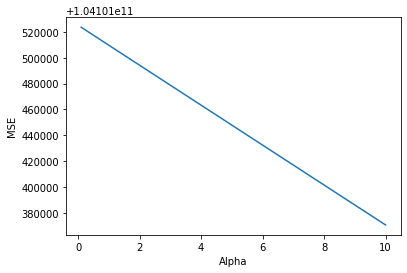

In [132]:
#evaluation des performance de la regression lasso
# Importez les librairies nécessaires
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Évaluez la performance du modèle en utilisant R²
r2 = r2_score(y_test, y_pred)
print("R2 score :", r2)

# Évaluez la performance du modèle en utilisant MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error mse :", mse)

# Évaluez la performance du modèle en utilisant MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error MAE  :", mae)


# Tracer la courbe de performance en fonction du paramètre de régularisation alpha
alphas = [0.1, 0.5, 1, 2, 5, 10]
scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(mean_squared_error(y_test, y_pred))
plt.plot(alphas, scores)
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.show()



SVM Model

In [133]:
import numpy as np
from sklearn.svm import SVR

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Create the SVM model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set  
y_pred = model.predict(X_test)
 
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 238932.51
Mean Squared Error: 124201741372.81
R2 Score: -0.10


In [134]:
# First, import the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Create a random forest regressor model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 238932.51
Mean Squared Error: 124201741372.81
R2 Score: -0.10


In [135]:
df3

,Nature mutation,Valeur fonciere,Code voie,Code postal,Commune,Code commune,Code departement,Code type local,Surface reelle bati,Surface terrain
400763,Vente,230000.0,6930,13015,MARSEILLE 15EME,215,13,4,270.0,151.0
400768,Vente,610000.0,4083,13016,MARSEILLE 16EME,216,13,1,118.0,605.0
400820,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,3,0.0,278.0
400821,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,45.0,278.0
400822,Vente,260000.0,4755,13016,MARSEILLE 16EME,216,13,2,52.0,278.0
...,...,...,...,...,...,...,...,...,...,...
441152,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,45.0,828.0
441153,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,37.0,828.0
441154,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,100.0,828.0
441155,Vente,520000.0,2856,13011,MARSEILLE 11EME,211,13,2,80.0,828.0


In [138]:
df5=df3[["Valeur fonciere","Code postal","Surface reelle bati"]]

# Chargement des données et sélection des colonnes 'col1', 'col2' et 'col3'
CP1 = df5['Code postal']


# Conversion de chaque colonne en variables dummies
CP1_dummies = pd.get_dummies(CP1, prefix='CP1')


# Concaténation des variables dummies avec le reste des données
df5 = pd.concat([df5, CP1], axis=1)

# Suppression des colonnes originales
df5 = df5.drop(columns=['Code postal'])


In [139]:
# Sélectionner les colonnes à utiliser comme features
features= df5.drop(columns=['Valeur fonciere'])

# Sélectionner la colonne cible
target= Y = df5["Valeur fonciere"]

# Normaliser les features en utilisant StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
X = scaled_features

In [141]:
# Éliminer les colonnes corrélées en utilisant une matrice de corrélation
X = pd.DataFrame(X, columns=features.columns)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_scaled = X.drop(X[to_drop], axis=1)


<ipython-input-141-272c6db5c57f>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [142]:
# régression Lasso
# avec un coefficient alpha égal à 0.1
lasso = Lasso(alpha=0.1)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2)

# Entraîner le modèle sur l'ensemble d'entraînement
lasso.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = lasso.predict(X_test)

# Calculer et afficher l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 12638668983120.65


In [143]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Create the SVM model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set  
y_pred = model.predict(X_test)
 
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 1260440.08
Mean Squared Error: 15921857069541.69
R2 Score: -0.08
